# Week 3

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from typing import List
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from week_3_functions import *

In [6]:
# %load_ext autoreload
# %autoreload 2

%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Churn prediction model

## Homework

In [23]:
def feat_eng(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create new features from existing features in a dataframe.

    Args:
        df (pd.DataFrame): dataframe to create new features from

    Returns:
        pd.DataFrame: dataframe with new features
    """
    return (
        df.assign(
        rooms_per_household = lambda x: x.total_rooms / x.households,
        bedrooms_per_room = lambda x: x.total_bedrooms / x.total_rooms,
        population_per_household = lambda x: x.population / x.households,
        above_average = df['median_house_value'].apply(lambda x: 1 if x > df.median_house_value.mean() else 0)
        )
    )

def create_correlation_matrix(df: pd.DataFrame) -> None:

    # select only numeric columns
    df = df.select_dtypes(include=np.number)

    corr_matrix = df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True)
    plt.show()




In [29]:
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"

data = fetch_data(url)

# select ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity'] 
# from data
data = data[['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']]

data = feat_eng(data)
print(data.median_house_value.mean())
data.head(1)

X = data.drop('median_house_value', axis=1)
y = data['median_house_value']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)



206855.81690891474


In [15]:
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

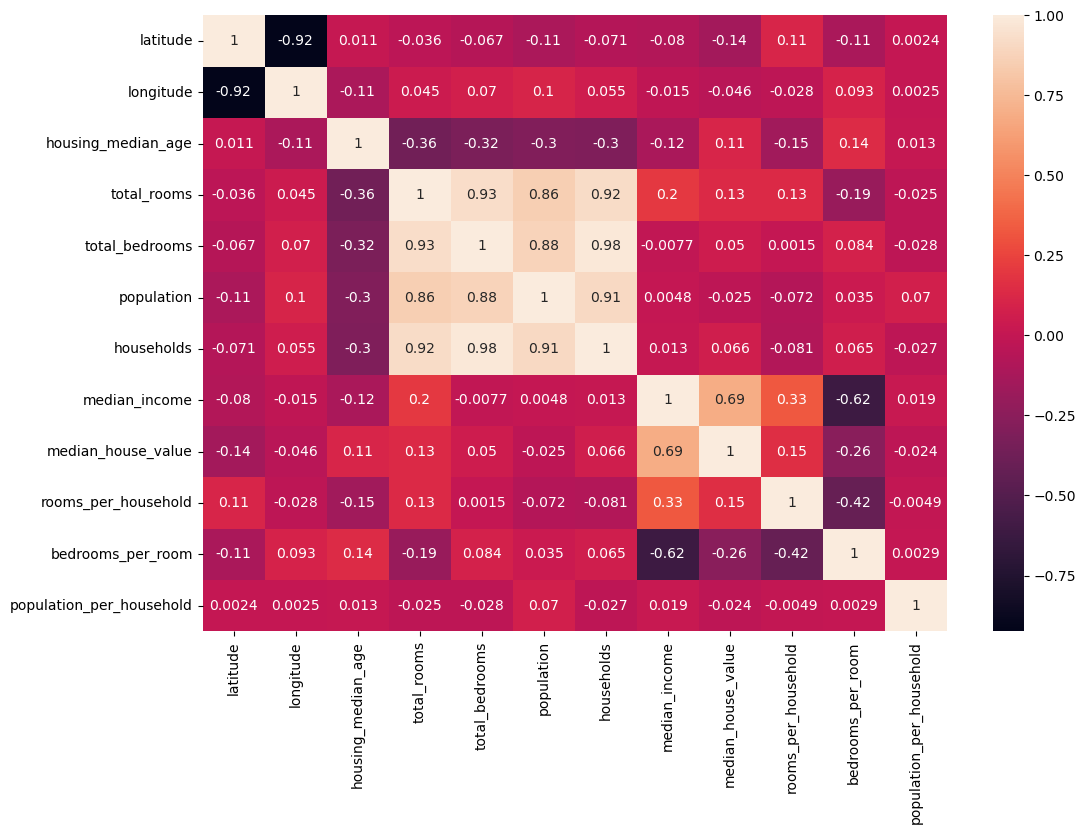

In [16]:
create_correlation_matrix(data)